In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [3]:
df = pd.read_csv("loan.csv",  encoding = "ISO-8859-1")

D:\Programs\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [5]:
# removing all columns where all elements are null (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
df.dropna(axis=1, how='all', inplace=True)

In [6]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
                            ... 
acc_now_delinq              0.00
chargeoff_within_12_mths    0.14
delinq_amnt                 0.00
pub_rec_bankruptcies        1.75
tax_liens                   0.10
Length: 57, dtype: float64

In [7]:
# rows having all missing values
df.isnull().all(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Length: 39717, dtype: bool

In [8]:
df.dropna(how='all', inplace=True)

In [9]:
df.isnull().all(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Length: 39717, dtype: bool

In [10]:
# checking the percetage of zeros in each column
round(100*(df.eq(0).sum()/len(df.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.32
                             ...  
acc_now_delinq              100.00
chargeoff_within_12_mths     99.86
delinq_amnt                 100.00
pub_rec_bankruptcies         94.01
tax_liens                    99.90
Length: 57, dtype: float64

In [11]:
# removing the columns that have majorly zero
df = df.drop('tax_liens', axis=1)
df = df.drop('delinq_amnt', axis=1)
df = df.drop('pub_rec_bankruptcies', axis=1)
df = df.drop('chargeoff_within_12_mths', axis = 1)
df = df.drop('acc_now_delinq', axis = 1)
df = df.drop('collections_12_mths_ex_med', axis = 1)
df = df.drop('collection_recovery_fee', axis = 1)
df = df.drop('recoveries', axis = 1)
df = df.drop('total_rec_late_fee', axis = 1)
df = df.drop('out_prncp_inv', axis = 1)
df = df.drop('out_prncp', axis = 1)
df = df.drop('pub_rec', axis = 1)
df = df.drop('delinq_2yrs', axis = 1)

In [12]:
round(100*(df.eq(0).sum()/len(df.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.32
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
url                        0.00
desc                       0.00
purpose                    0.00
title                      0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.46
earliest_cr_line           0.00
inq_last_6mths            48.59
mths_since_last_delinq     1.12
mths_since_last_record     1.69
open_acc                   0.00
revol_bal                  2.50
revol_ut

In [13]:
# removing columns that seem unnecessary
df = df.drop('emp_title', axis=1)
df = df.drop('url', axis=1)
df = df.drop('desc', axis=1)
df = df.drop('title', axis = 1)
df = df.drop('zip_code', axis = 1)

# reconsider
#df = df.drop('inq_last_6mths', axis = 1)

df = df.drop('mths_since_last_delinq', axis = 1)
df = df.drop('mths_since_last_record', axis = 1)
df = df.drop('initial_list_status', axis = 1)
df = df.drop('open_acc', axis=1)
df = df.drop('total_acc', axis=1)
df = df.drop('total_pymnt', axis=1)
df = df.drop('total_rec_prncp', axis=1)
df = df.drop('total_rec_int', axis=1)
df = df.drop('last_pymnt_amnt', axis=1)
df = df.drop('last_credit_pull_d', axis=1)
df = df.drop('total_pymnt_inv', axis=1)

In [14]:
round(100*(df.eq(0).sum()/len(df.index)), 2)

id                      0.00
member_id               0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.32
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
pymnt_plan              0.00
purpose                 0.00
addr_state              0.00
dti                     0.46
earliest_cr_line        0.00
inq_last_6mths         48.59
revol_bal               2.50
revol_util              0.00
last_pymnt_d            0.00
next_pymnt_d            0.00
policy_code             0.00
application_type        0.00
dtype: float64

In [15]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                      0.00
member_id               0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
pymnt_plan              0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
revol_bal               0.00
revol_util              0.13
last_pymnt_d            0.18
next_pymnt_d           97.13
policy_code             0.00
application_type        0.00
dtype: float64

In [16]:
# next_pymnt_d has more than 97% null values, removing the column
df = df.drop('next_pymnt_d', axis=1)

In [17]:
# this column has same value for the rows, doesn't add any value to our analysis
df = df.drop('pymnt_plan', axis=1)

In [18]:
# this column has same value for the rows, doesn't add any value to our analysis
df = df.drop('application_type', axis=1)

In [19]:
# Columns loan_amnt and fund_amnt seem to have similar set of values. It it's highly correlated, we can remove one of the columns
df["loan_amnt"].corr(df["funded_amnt"])

0.9815782188237627

In [20]:
# Removing funded_amnt
df = df.drop('funded_amnt', axis=1)

In [21]:
# Even funded_amnt_inv is also hihgly correlated with load_amnt, removing funded_amnt_inv also
df["loan_amnt"].corr(df["funded_amnt_inv"])


0.9400335348163549

In [22]:
df = df.drop('funded_amnt_inv', axis=1)

In [23]:
# just to visualise the cleaned data in excel
df.to_csv("cleaned.csv")

In [24]:
# removing unnecessary symbols and texts
df['int_rate'] = df['int_rate'].str.replace('\%','')

In [25]:
df['revol_util'] = df['revol_util'].str.replace('\%','').astype(float)

In [26]:
df['term'] = df['term'].str.replace('months','')

In [27]:
df['emp_length'] = df['emp_length'].str.replace('\+ years','')
df['emp_length'] = df['emp_length'].str.replace('years','')
df['emp_length'] = df['emp_length'].str.replace('<','')
df['emp_length'] = df['emp_length'].str.replace('year','')

In [28]:
df["int_rate"] = df["int_rate"].astype(float)

In [29]:
df["issue_d"]

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [30]:
# I don't think int_rate and installment provide any distinct insight, so removing the installment
#df = df.drop('installment', axis=1)

In [31]:
# policy code is not required
df = df.drop('policy_code', axis=1)

In [32]:
df['term'] = df['term'].str.replace('months','')

In [33]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [34]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

In [35]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

In [36]:
df

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,last_pymnt_d
0,1077501,1296599,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1985-01-01,1,13648,83.7,2015-01-01
1,1077430,1314167,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,1999-04-01,5,1687,9.4,2013-04-01
2,1077175,1313524,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2001-11-01,2,2956,98.5,2014-06-01
3,1076863,1277178,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,1996-02-01,1,5598,21.0,2015-01-01
4,1075358,1311748,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,1996-01-01,0,27783,53.9,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,1990-11-01,0,7274,13.1,2010-07-01
39713,90665,90607,8500,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,1986-12-01,1,8847,26.9,2010-07-01
39714,90395,90390,5000,36,8.07,156.84,A,A4,1,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,1998-10-01,0,9698,19.4,2008-04-01
39715,90376,89243,5000,36,7.43,155.38,A,A2,1,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72,1988-11-01,0,85607,0.7,2008-01-01


In [37]:
#df.to_csv("cleaned.csv")

In [38]:
df.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [39]:
df.loan_amnt.describe(percentiles=[.10, .20, .30, .40, .50, .60, .70, .80, .90])

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
10%       3200.000000
20%       5000.000000
30%       6000.000000
40%       8000.000000
50%      10000.000000
60%      12000.000000
70%      14000.000000
80%      16750.000000
90%      22000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

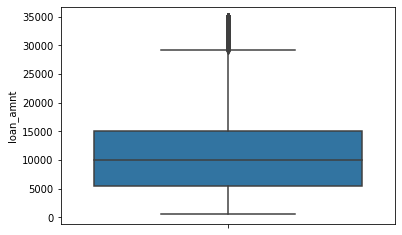

In [40]:
# checking the distribution of loan_amnt
sns.boxplot(y=df.loan_amnt)
plt.show()

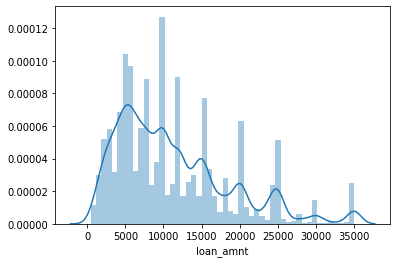

In [41]:
#from the graph, it looks like relatively higher number of loans were issued in rounded figures such as 5000, 10000, 12000, 15000, 20000, 25000, 30000 and 35000
# also, don't see outliers, mean and median are comparable.
sns.distplot(df.loan_amnt)
plt.show()

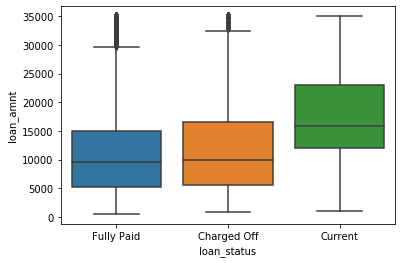

In [42]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [44]:
# to identify the categorical variable
df.nunique().sort_values()

term                       2
loan_status                3
verification_status        3
home_ownership             5
grade                      7
inq_last_6mths             9
emp_length                11
purpose                   14
sub_grade                 35
addr_state                50
issue_d                   55
last_pymnt_d             101
int_rate                 371
earliest_cr_line         526
loan_amnt                885
revol_util              1089
dti                     2868
annual_inc              5318
installment            15383
revol_bal              21711
member_id              39717
id                     39717
dtype: int64

In [62]:
# almost 75% of the loans were below 15,000
df.groupby(pd.cut(df.loan_amnt, np.arange(0, 35000, 5000)))['id'].count() * 100/  len(df.index)

loan_amnt
(0, 5000]         24.090440
(5000, 10000]     32.630863
(10000, 15000]    20.107259
(15000, 20000]    11.559282
(20000, 25000]     7.550923
(25000, 30000]     1.976484
Name: id, dtype: float64

In [63]:
# among all loans, 73.25% of them were short term
df.groupby('term')['id'].count() * 100 / len(df.index)

term
 36     73.258302
 60     26.741698
Name: id, dtype: float64

In [57]:
df.int_rate.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
10%          7.140000
20%          7.900000
30%          9.990000
40%         10.990000
50%         11.860000
60%         12.870000
70%         13.920000
80%         15.270000
90%         16.890000
99%         20.990000
max         24.590000
Name: int_rate, dtype: float64

In [67]:
# from the below result, it can be seen that 10-15% is the interest rates of most of the loans
df.groupby(pd.cut(df.int_rate, np.arange(5, 30, 5)))['id'].count() * 100/  len(df.index)

int_rate
(5, 10]     31.203263
(10, 15]    47.319787
(15, 20]    19.281416
(20, 25]     2.195533
Name: id, dtype: float64

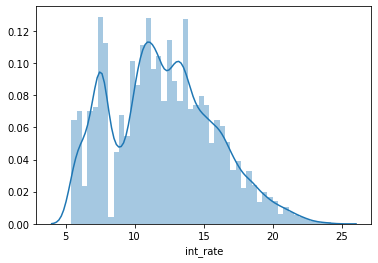

In [68]:
sns.distplot(df.int_rate)
plt.show()

In [69]:
df.groupby('grade')['id'].count() * 100/  len(df.index)

grade
A    25.392149
B    30.264119
C    20.389254
D    13.362036
E     7.155626
F     2.641186
G     0.795629
Name: id, dtype: float64

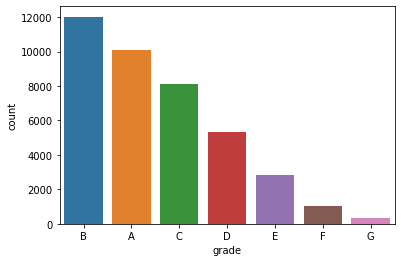

In [71]:
# Top 3 loan grades are B, A and C
sns.countplot(df.grade, order = df.grade.value_counts().index)

In [75]:
df.groupby('emp_length')['id'].count() * 100/  len(df.index)

emp_length
 1     11.539139
1       8.157716
10     22.355666
2      11.048166
3      10.310446
4       8.651207
5       8.263464
6       5.612206
7       4.464083
8       3.723846
9       3.167409
Name: id, dtype: float64

In [81]:
# Need to correct two versions of 1
df['emp_length'] = df['emp_length'].str.strip()


In [82]:
df.groupby('emp_length')['id'].count() * 100/  len(df.index)

emp_length
1     19.696855
10    22.355666
2     11.048166
3     10.310446
4      8.651207
5      8.263464
6      5.612206
7      4.464083
8      3.723846
9      3.167409
Name: id, dtype: float64

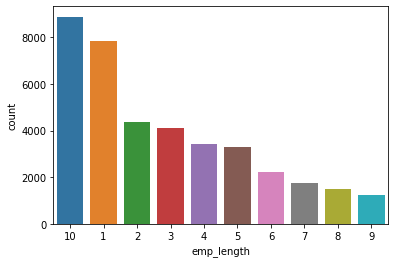

In [85]:
# most of the loans are issued to people with 10 or more years of experience
sns.countplot(df.emp_length, order = df.emp_length.value_counts().index)

In [89]:
df.groupby('home_ownership').size() * 100 / len(df.index)

home_ownership
MORTGAGE    44.462069
NONE         0.007553
OTHER        0.246746
OWN          7.699474
RENT        47.584158
dtype: float64

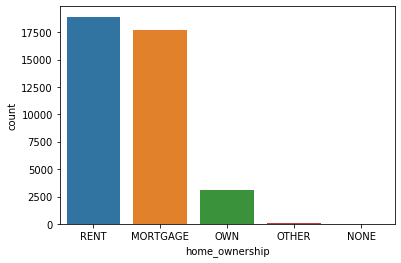

In [90]:
# from the plot, it is clear that the most of the people who have taken loans have thier home on rent or on mortgage
sns.countplot(df.home_ownership, order = df.home_ownership.value_counts().index)

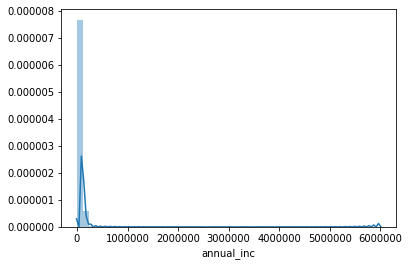

In [91]:
sns.distplot(df.annual_inc)
plt.show()

In [167]:
df.annual_inc.describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8, .85, .9,.95, .98, .99])

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
10%      3.000000e+04
20%      3.750000e+04
25%      4.040400e+04
30%      4.500000e+04
40%      5.040000e+04
50%      5.900000e+04
60%      6.584440e+04
70%      7.560000e+04
75%      8.230000e+04
80%      9.000000e+04
85%      1.000000e+05
90%      1.160000e+05
95%      1.420000e+05
98%      1.870000e+05
99%      2.349994e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

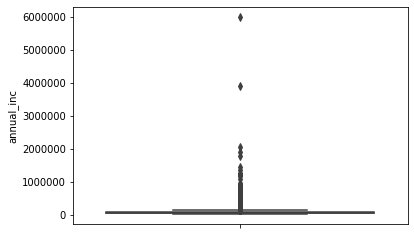

In [164]:
sns.boxplot(y=df.annual_inc)
plt.show()

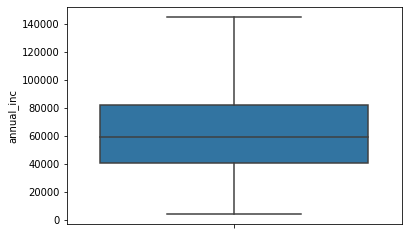

In [166]:
sns.boxplot(y=df.annual_inc,  showfliers=False)
plt.show()
# from the below plot, it is clear that 75% people have income less than 80,000$

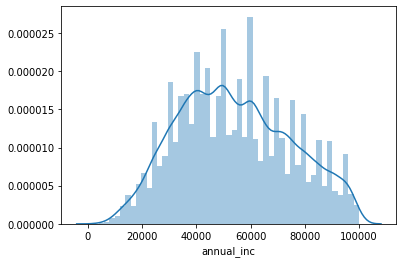

In [138]:
# distribution of people with low income (<100,000$)
sns.distplot(df[df.annual_inc < 1e+05].annual_inc)

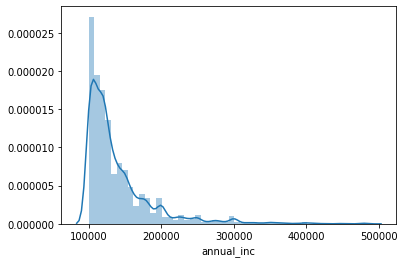

In [157]:
# distribution of people with medium income (>= 100,000$ to < 500,000$)
sns.distplot(df[(df.annual_inc >= 1.000000e+05) & (df.annual_inc < 5e+05)].annual_inc)

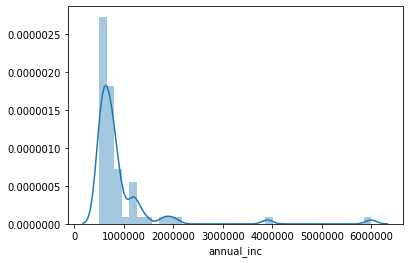

In [161]:
# distribution of people with high income, >= 500,000$
sns.distplot(df[df.annual_inc >= 5e+05].annual_inc)

In [168]:
df.groupby('verification_status').size() * 100 / len(df.index)

verification_status
Not Verified       42.603923
Source Verified    25.145404
Verified           32.250674
dtype: float64

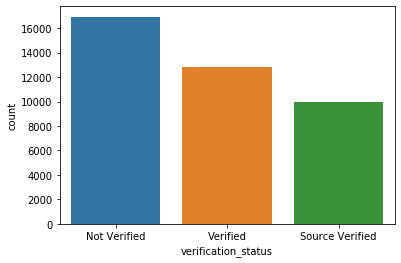

In [172]:
sns.countplot(df.verification_status, order = df.verification_status.value_counts().index)
# from the bar chart and above statistics, most of the people hold 'Not Verified' status, interestingly only 25% of people are their source verified.